In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from sklearn.datasets import load_boston

boston=load_boston()

boston

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [22]:
df=pd.DataFrame(boston.data,
                columns=['CRIM','ZN','INDUS','CHAS',
                      'NOX','RM','AGE','DIS', 'RAD',
                      'TAX', 'PTRATIO', 'B', 'LSTAT'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [23]:
df2=pd.DataFrame(boston.target,columns=['価格'])
df2

,価格
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [24]:
df3=pd.concat([df2,df],axis=1)
df3

,価格,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [25]:
corrcoefs=[]
deters=[]

for i in df:
    X=df[i].values.reshape(-1,1)
    Y=df2['価格'].values.reshape(-1,1)
    corrcoefs.append(np.corrcoef(X,Y))
    
    # 訓練データとテストデータ
    X_train, X_test, y_train, y_test = train_test_split(X,Y,
    test_size=0.3,
    random_state=0)
    model=LinearRegression()
    model.fit(X_train, y_train)
    
    y_pre=model.predict(X_test)
    
    deters.append(model.score(X_train, y_train))


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/l

In [26]:
re_df=pd.DataFrame({'説明変数':list(df),'決定係数':deters})
re_df=re_df.sort_values(by='決定係数',ascending=False)
re_df

,説明変数,決定係数
12,LSTAT,0.552478
5,RM,0.502650
10,PTRATIO,0.318924
2,INDUS,0.254380
9,TAX,0.231668
4,NOX,0.182065
6,AGE,0.152835
8,RAD,0.151736
0,CRIM,0.150686
1,ZN,0.149085


In [27]:
def show_graph(X, Y, x, y,st):
    fig, ax = plt.subplots(dpi=100)
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'tab:red')
    ax.set_title('1住戸あたりの平均部屋数から価格予測')
    ax.set_xlabel(st)
    ax.set_ylabel('価格')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 37)
    ax.grid()
    fig.show()

In [28]:
X=df['LSTAT'].values.reshape(-1,1)
Y=df2['価格'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,Y,
test_size=0.3,
random_state=0)
model=LinearRegression()
model.fit(X_train, y_train)
y_pre=model.predict(X_test)

print(f'決定係数:{model.score(X_train, y_train)}')

決定係数:0.5524780757890007


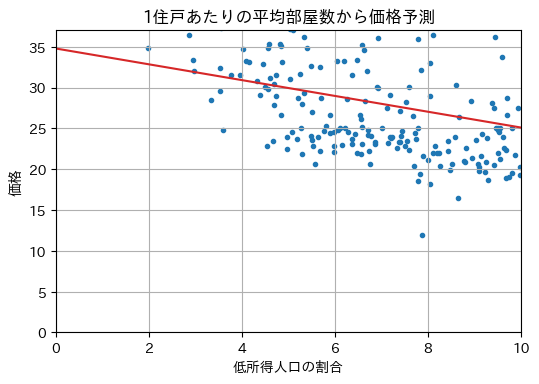

In [29]:
x = np.linspace(0,25,25)
y_pre=model.predict(x.reshape(-1, 1))
show_graph(X,Y,x,y_pre,'低所得人口の割合')

In [30]:
X=df['RM'].values.reshape(-1,1)
Y=df2['価格'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,Y,
test_size=0.3,
random_state=0)
model=LinearRegression()
model.fit(X_train, y_train)
y_pre=model.predict(X_test)

print(f'決定係数:{model.score(X_train, y_train)}')

決定係数:0.5026497630040827


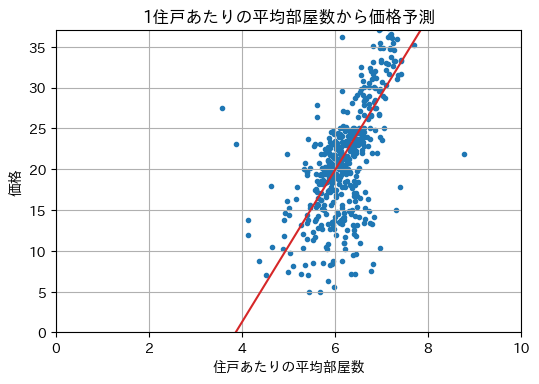

In [31]:
x = np.linspace(0,10,10)
y_pre=model.predict(x.reshape(-1, 1))
show_graph(X,Y,x,y_pre,'住戸あたりの平均部屋数')

In [32]:
df4=pd.concat([df['LSTAT'],df['RM']],axis=1)
df4

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [33]:
X=df4.values
Y=df2['価格'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,Y,
test_size=0.3,
random_state=0)
model=LinearRegression()
model.fit(X_train, y_train)
y_pre=model.predict(X_test)

print(f'決定係数:{model.score(X_train, y_train)}')

決定係数:0.6509440237430768


In [34]:
def min_max_p(p):
  #最小値の計算
  min_p = p.min()
  #最大値の計算
  max_p = p.max()
  #正規化の計算
  min_max_p = (p - min_p) / (max_p - min_p)
  return min_max_p

def standard_n(n, axis = None, ddof = 0):
  #平均値を計算
  mean_n = n.mean(axis = axis, keepdims = True)
  #標準偏差を計算 ddof=0なら標準偏差、ddof=1なら不偏標準偏差
  std_n = n.std(axis = axis, keepdims = True, ddof = ddof)
  #標準化の計算
  standard_n = (n - mean_n) / std_n
  return standard_n

In [35]:
X=df4.values
Y=df2['価格'].values.reshape(-1,1)

X=min_max_p(X) # 正規化

X_train, X_test, y_train, y_test = train_test_split(X,Y,
test_size=0.3,
random_state=0)
model=LinearRegression()
model.fit(X_train, y_train)
y_pre=model.predict(X_test)

print(f'決定係数:{model.score(X_train, y_train)}')

決定係数:0.6509440237430768


In [36]:
X=df4.values
Y=df2['価格'].values.reshape(-1,1)

X=standard_n(X,0,0) # 標準化

X_train, X_test, y_train, y_test = train_test_split(X,Y,
test_size=0.3,
random_state=0)
model=LinearRegression()
model.fit(X_train, y_train)
y_pre=model.predict(X_test)

print(f'決定係数:{model.score(X_train, y_train)}')

決定係数:0.6509440237430768
